# Pushing the phase-plane symmetries of the Lotka-Volterra model forward
*Written by:* Johannes Borgqvist,<br>
*Date:* 2022-08-18.<br>
In this script, we consider the phase plane ODE

\begin{equation}
\dfrac{\mathrm{d}v}{\mathrm{d}u}=\dfrac{\alpha v(u-1)}{u(1-v)}.
  \label{eq:LV_phase_plane}
\end{equation}
which has the following two non-trivial symmetries:
\begin{align}
  X_u&=\dfrac{1}{\alpha}\left(\dfrac{u}{u-1}\right)\partial_u,\label{eq:LV_u}\\
  X_v&=\dfrac{v}{1-v}\partial_v.\label{eq:LV_v}
\end{align}
Now, the full Lotka-Volterra model is given by 
\begin{equation}
  \begin{split}
    \dfrac{\mathrm{d}u}{\mathrm{d}\tau}&=u(1-v),\\
    \dfrac{\mathrm{d}v}{\mathrm{d}\tau}&=\alpha v(u-1),\\    
    \end{split}
  \label{eq:LV}
\end{equation}
and what we show in the paper is that the two non-trivial symmetries that we listed previously can be extended to two full symmetries acting on time as well as the states, i.e. mapping $(\tau,u(\tau),v(\tau))$ to another solution curve. These two unknown symmetries are generated by 
\begin{align}
  X_{\tau,u}&=\xi_{u}(\tau,u,v)\partial_\tau+\dfrac{1}{\alpha}\left(\dfrac{u}{u-1}\right)\partial_u,\label{eq:LV_u_full}\\
  X_{\tau,v}&=\xi_{v}(\tau,u,v)\partial_\tau+\dfrac{v}{1-v}\partial_v.\label{eq:LV_v_full}
\end{align}
and the two time infinitesimals $\xi_u$ and $\xi_v$ satisfy the following two PDEs
\begin{align}
  X_{\tau,u}:\quad u(1-v)\dfrac{\partial\xi_u}{\partial u}+\alpha v(u-1)\dfrac{\partial\xi_u}{\partial u}&=-\dfrac{u}{(u-1)^2},\label{eq:xi_u}\\
  X_{\tau,v}:\quad u(1-v)\dfrac{\partial\xi_v}{\partial u}+\alpha v(u-1)\dfrac{\partial\xi_v}{\partial u}&=+\dfrac{\alpha v}{(1-v)^2}\quad.\label{eq:xi_v}
\end{align}
In this notebook, we will find these two symmetries by solving the two PDEs above and then we will plot their action on solution curves to the full Lotka-Volterra model. 

# Load packages

In [21]:
from sympy import * # For symbolic computations

# The $X_{\tau,u}$ symmetry


In [11]:
# Allocate all our symbols
# Independent and dependent variables (i.e. states and variable)
u,v = symbols('u v')
# The rate parameter alpha
alpha = symbols('alpha')
# Allocate our unknown infinitesimal
xi = Function('xi')
xi_u = xi(u,v)
# Define our derivatives
xi_u_u = xi_u.diff(u)
xi_u_v = xi_u.diff(v)
#xi_u = symbols('xi_u',cls=Function)
# Define our PDE for this time tangent
#xi_u_eq = Eq(u*(1-v)*xi_u_u+alpha*v*(u-1)*xi_u_v+((u)/((u-1)**2)),0)
xi_u_eq = Eq(u*(1-v)*(u-1)**2*xi_u_u+1*v*(u-1)*(u-1)**2*xi_u_v+u,0)
#xi_u_eq = u*(1-v)*(u-1)**2*xi_u_u+1*v*(u-1)*(u-1)**2*xi_u_v+u
# Now, solve our PDE for the time tangent
xi_u_sol = pdsolve(xi_u_eq)
# Also, check that we actually solve the equation
#assert checkpdesol(xi_u_eq, xi_u_sol)[0]
#print(checkpdesol(xi_u_eq, xi_u_sol))
# Print our time tangent
print(latex(xi_u_sol,mode='equation').replace("\\begin{equation}","\\begin{equation}\n").replace("\\end{equation}",".\n\\end{equation}"))
print(xi_u_sol)
print(checkpdesol(xi_u_eq, xi_u_sol))

\begin{equation}
\xi{\left(u,v \right)} = F{\left(- u v e^{- u - v} \right)} + \frac{1}{u \left(W\left(- v e^{- v}\right) + 1\right) - W\left(- v e^{- v}\right) - 1}.
\end{equation}
Eq(xi(u, v), F(-u*v*exp(-u - v)) + 1/(u*(LambertW(-v*exp(-v)) + 1) - LambertW(-v*exp(-v)) - 1))
(False, (u**2*v*LambertW(-v*exp(-v)) - u**2*LambertW(-v*exp(-v)) + u*v*LambertW(-v*exp(-v))**2 + u*v + u*LambertW(-v*exp(-v))**3 + 2*u*LambertW(-v*exp(-v))**2 + 3*u*LambertW(-v*exp(-v)) + v*LambertW(-v*exp(-v)) - LambertW(-v*exp(-v)))/(LambertW(-v*exp(-v))**3 + 3*LambertW(-v*exp(-v))**2 + 3*LambertW(-v*exp(-v)) + 1))


So it turns out that we have to solve this equation for discrete values of $\alpha$. Below, comes a selection of these solutions. 

### $\alpha=1$

\begin{equation}
\xi{\left(u,v \right)} = F{\left(- u v e^{- u - v} \right)} + \frac{1}{u \left(W\left(- v e^{- v}\right) + 1\right) - W\left(- v e^{- v}\right) - 1}.
\end{equation}


### $\alpha=2$

\begin{equation}
\xi_u{\left(u,v \right)} = F{\left(- u^{2} v e^{- 2 u - v} \right)} + \frac{1}{u \left(W\left(- v e^{- v}\right) + 1\right) - W\left(- v e^{- v}\right) - 1}.
\end{equation}

### $\alpha=3$


\begin{equation}
\xi_u{\left(u,v \right)} = F{\left(- u^{3} v e^{- 3 u - v} \right)} + \frac{1}{u \left(W\left(- v e^{- v}\right) + 1\right) - W\left(- v e^{- v}\right) - 1}.
\end{equation}

### $\alpha=4$

\begin{equation}
\xi_u{\left(u,v \right)} = F{\left(- u^{4} v e^{- 4 u - v} \right)} + \frac{1}{u \left(W\left(- v e^{- v}\right) + 1\right) - W\left(- v e^{- v}\right) - 1}.
\end{equation}

### Conclusion
Now, it seems like a general solution might be given by
\begin{equation}
\xi_u{\left(u,v \right)} = F{\left(-u^{\alpha} v e^{- \alpha u - v} \right)} + \frac{1}{u \left(W\left(- v e^{- v}\right) + 1\right) - W\left(- v e^{- v}\right) - 1}.
\end{equation}
for an arbitrary function $F\in\mathcal{C}^{\infty}(\mathbb{R})$ and where $W\in\mathcal{C}^{\infty}(\mathbb{C})$ is the [*Lambert inverse function*](https://docs.sympy.org/latest/modules/functions/elementary.html) where $W(z)$ is defined as the inverse of $w\exp(w)$. A particularly interesting choice of $F$ is given by $F(x)=-\ln(-x)$, and the corresponding candidate infinitesimal is given by:
    
\begin{equation}
\begin{split}
\xi_u{\left(u,v \right)} &= H(u,v;\alpha)  + \frac{1}{u \left(W\left(- v e^{- v}\right) + 1\right) - W\left(- v e^{- v}\right) - 1},\\
H(u,v;\alpha)&=\alpha u+v-\ln\left(u^\alpha v\right).
\end{split}
\end{equation}    
One thing that is a bit worrying is that SymPy's own checkpdesol says that the solution SymPy fins does not actually solve the PDE at hand. Anyhow, we'll work with it and see what comes of it.

# The $X_{\tau,v}$ symmetry

In [17]:
# Allocate our unknown infinitesimal
xi = Function('xi')
xi_v = xi(u,v)
# Define our derivatives
xi_v_u = xi_v.diff(u)
xi_v_v = xi_v.diff(v)
#xi_u = symbols('xi_u',cls=Function)
# Define our PDE for this time tangent
#xi_u_eq = Eq(u*(1-v)*xi_u_u+alpha*v*(u-1)*xi_u_v+((alpha v)/((1-v)**2)),0)
xi_v_eq = Eq(u*(1-v)*(1-v)**2*xi_v_u+4*v*(u-1)*(1-v)**2*xi_v_v-4*v,0)
# Now, solve our PDE for the time tangent
xi_v_sol = pdsolve(xi_v_eq)
# Print our time tangent
print(latex(xi_v_sol,mode='equation').replace("\\begin{equation}","\\begin{equation}\n").replace("\\end{equation}",".\n\\end{equation}").replace("\\log","\\ln"))

\begin{equation}
\xi{\left(u,v \right)} = F{\left(- u^{4} v e^{- 4 u - v} \right)} - \frac{4 \ln{\left(u \right)} W\left(- v e^{- v}\right)}{W^{3}\left(- v e^{- v}\right) + 3 W^{2}\left(- v e^{- v}\right) + 3 W\left(- v e^{- v}\right) + 1}.
\end{equation}


So it turns out that we have to solve this equation for discrete values of $\alpha$. Below, comes a selection of these solutions. 

### $\alpha=1$


\begin{equation}
\xi{\left(u,v \right)} = F{\left(- u v e^{- u - v} \right)} - \frac{\ln{\left(u \right)} W\left(- v e^{- v}\right)}{W^{3}\left(- v e^{- v}\right) + 3 W^{2}\left(- v e^{- v}\right) + 3 W\left(- v e^{- v}\right) + 1}.
\end{equation}





### $\alpha=2$

\begin{equation}
\xi{\left(u,v \right)} = F{\left(- u^{2} v e^{- 2 u - v} \right)} - \frac{2 \ln{\left(u \right)} W\left(- v e^{- v}\right)}{W^{3}\left(- v e^{- v}\right) + 3 W^{2}\left(- v e^{- v}\right) + 3 W\left(- v e^{- v}\right) + 1}.
\end{equation}


### $\alpha=3$

\begin{equation}
\xi{\left(u,v \right)} = F{\left(- u^{3} v e^{- 3 u - v} \right)} - \frac{3 \ln{\left(u \right)} W\left(- v e^{- v}\right)}{W^{3}\left(- v e^{- v}\right) + 3 W^{2}\left(- v e^{- v}\right) + 3 W\left(- v e^{- v}\right) + 1}.
\end{equation}



### $\alpha=4$

\begin{equation}
\xi{\left(u,v \right)} = F{\left(- u^{4} v e^{- 4 u - v} \right)} - \frac{4 \ln{\left(u \right)} W\left(- v e^{- v}\right)}{W^{3}\left(- v e^{- v}\right) + 3 W^{2}\left(- v e^{- v}\right) + 3 W\left(- v e^{- v}\right) + 1}.
\end{equation}


### Conclusion
Now, it seems like a general solution might be given by
\begin{equation}
\xi_u{\left(u,v \right)} = F{\left(- u^{\alpha} v e^{- \alpha u - v} \right)} + \frac{\alpha \ln{\left(u \right)} W\left(- v e^{- v}\right)}{W^{3}\left(- v e^{- v}\right) + 3 W^{2}\left(- v e^{- v}\right) + 3 W\left(- v e^{- v}\right) + 1}
.
\end{equation}
    for an arbitrary function $F\in\mathcal{C}^{\infty}(\mathbb{R})$ and where $W\in\mathcal{C}^{\infty}(\mathbb{C})$ is the [*Lambert inverse function*](https://docs.sympy.org/latest/modules/functions/elementary.html) where $W(z)$ is defined as the inverse of $w\exp(w)$. A particularly interesting choice of $F$ is given by $F(x)=-\ln(-x)$, and the corresponding candidate infinitesimal is given by
\begin{equation}
\begin{split}
\xi_u{\left(u,v \right)} &= H(u,v;\alpha)  +  \frac{\alpha \ln{\left(u \right)} W\left(- v e^{- v}\right)}{W^{3}\left(- v e^{- v}\right) + 3 W^{2}\left(- v e^{- v}\right) + 3 W\left(- v e^{- v}\right) + 1},\\
H(u,v;\alpha)&=\alpha u+v-\ln\left(u^\alpha v\right).
\end{split}
\end{equation}
Again, SymPy's own checkpdesol does not say that this solution solves the PDE at hand, but we'll work with it anyway.

# Plotting the solutions of the Lotka-Volterra model and its symmetries
Ok, now we will move on and plot the solutions of the Lotka-Volterra model.
## Plot the solutions of the LV model

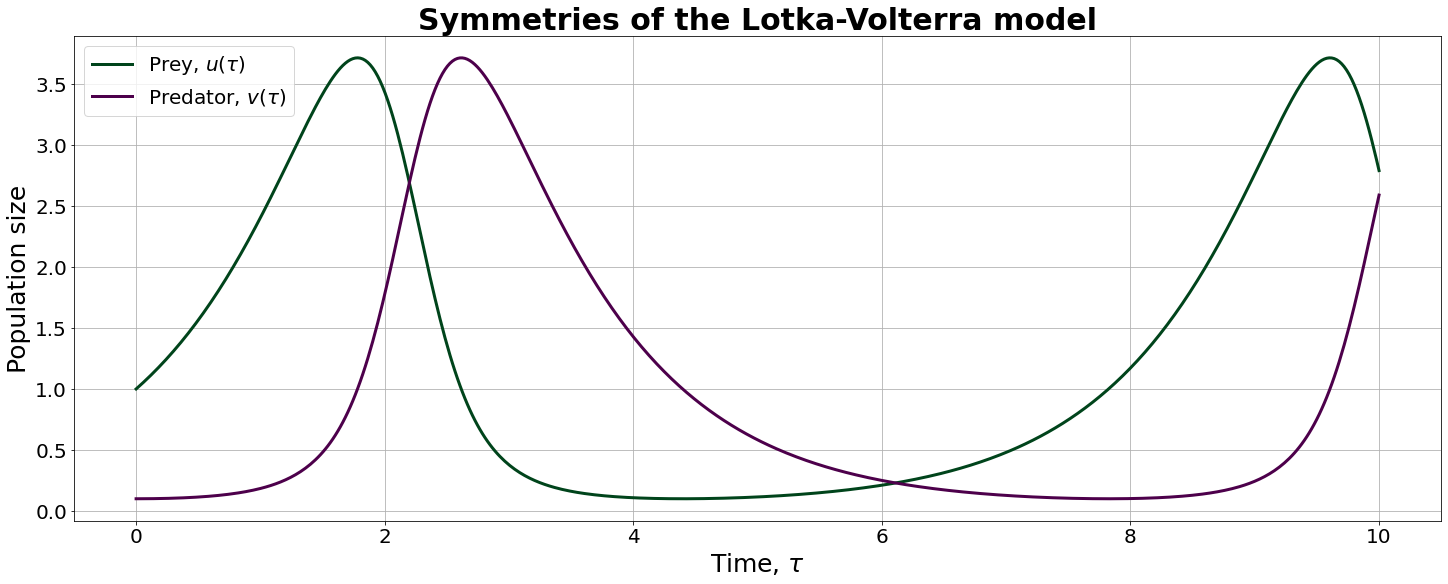

In [39]:
from numpy import * # For numerical calculations,
import matplotlib.pyplot as plt # For plotting,
from scipy import integrate # For solving ODEs.
# Function 1: ODE for the LV model
def dX_dt_LV(X, t=0,a=1):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ X[0]*(1-X[1]) ,
                   a*X[1]*(X[0]-1)])
# Define the time vector and the initial conditions
t = linspace(0, 10, 500)              # time
X0 = array([1, 0.10])                     # initials conditions: 10 rabbits and 5 foxes
# Solve the ODE at hand
X1, infodict = integrate.odeint(dX_dt_LV, X0, t, args = (1,),full_output=True)
infodict['message'] # >>> 'Integration successful.'
# Split the solution into its component parts
u, v = X1.T
# Plot our lovely solutions
fig_1 = plt.figure(constrained_layout=True, figsize=(20, 8))
plt.plot(t, u, '-', label="Prey, $u(\\tau)$" ,color=(0/256,68/256,27/256),linewidth=3.0)
plt.plot(t, v  , '-', label='Predator, $v(\\tau)$',color=(77/256,0/256,75/256),linewidth=3.0)
plt.grid()
plt.legend(loc='best',prop={"size":20})
plt.xlabel(xlabel='Time, $\\tau$',fontsize=25)
plt.ylabel(ylabel='Population size',fontsize=25)
# Change the size of the ticks
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
plt.title('Symmetries of the Lotka-Volterra model',fontsize=30,weight='bold')
plt.savefig('../Figures/LV_solutions.png')


### Plot the u-directional symmetry of the LV-model

In [62]:
# Import the lambert W function from scipy
from scipy.special import lambertw
# Function 2: ODE for the u-directional symmetry of the LV model
def dX_deps_LV_u(X, t=0,*parameters):
    # Extract the parameters
    alpha = parameters[0]
    # The internal energy
    H = -(X[0]**alpha*X[1])*exp(-(alpha*X[0]+X[1]))
    # Calculate our second invariant
    I2 = -X[1]*exp(-X[1])
    # The remaining term involving the Lambertz W function
    term_2 = ((1)/(X[0]*(lambertw(I2)+1)-lambertw(I2)-1))
    # Return the dynamics of the linear system
    return array([H+term_2,
                  (1/alpha)*(X[0]/(X[0]-1))
                  ,0])
# Set the value of alpha
alpha = 1
# The transformation parameter
epsilon_vec = arange(0,1,1/50)              # epsilon
# Try to solve the ODE at hand
Gamma_epsilon, infodict = integrate.odeint(dX_deps_LV_u, array([2,2]), epsilon_vec, args = (alpha,),full_output=True)

TypeError: Cannot cast array data from dtype('complex128') to dtype('float64') according to the rule 'safe'